In [1]:
# from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
# from keras.layers import Activation, Dense, Dropout, Flatten
# from keras.layers.normalization import BatchNormalization
# from keras.models import Sequential
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
# from skimage.io import imsave
import numpy as np
import os
import random
# import tensorflow as tf
# from time import time

import cv2

from scipy.misc import imresize
from skimage.transform import resize

import glob

import matplotlib.pyplot as plt
%matplotlib inline

# from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
# import random
# from keras import optimizers
from scipy.ndimage import filters

from keras.models import model_from_json

/home/tking/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def generator(batch_size, dir_path, H, W):
    while True:
        X = []
        Y = []
        img_batch = random.sample(glob.glob(dir_path), batch_size)
        for img in img_batch:
            # choose random index in features
            n= cv2.imread(img)#BGR
            m = imresize(n,(H,W,3))
            img_lab = cv2.cvtColor(m.astype(np.uint8), cv2.COLOR_BGR2LAB)
            L = img_lab[:,:,0].reshape(1,H,W,1)
            y = np.floor(img_lab[:,:,1:]/16)

            # to_categorical
            y0=y[:,:,0].flatten()
            y1=y[:,:,1].flatten()
            Yc2d0 = to_categorical(y0, num_classes = 16 )
            Yc3d0 = Yc2d0.reshape(H,W,16)
            Yc2d1 = to_categorical(y1, num_classes = 16 )
            Yc3d1 = Yc2d1.reshape(H,W,16)
            Yc3d = np.zeros((H,W,32))
            Yc3d[:,:,:16] = Yc3d0
            Yc3d[:,:,16:] = Yc3d1

            Y.append(Yc3d)
            X.append(L)
        X=np.array(X)
        Y=np.array(Y)
        X=np.reshape(X, (batch_size, H, W, 1))
        Y=np.reshape(Y, (batch_size, H, W, 32))
        yield X, Y

In [3]:
def XY2img(X,Y):
    H, W, _ = X.shape
    img_lab = np.zeros((H,W,3))
    img_lab[:,:,0] = X[:,:,0]
    img_lab[:,:,1] = np.argmax(Y[:,:,:16],axis=2)*16+8
    img_lab[:,:,2] = np.argmax(Y[:,:,16:],axis=2)*16+8
    img = cv2.cvtColor(img_lab.astype(np.uint8), cv2.COLOR_LAB2RGB)
    return img

In [4]:
def XY2imgf(X,Y):
    H, W, _ = X.shape
    img_lab = np.zeros((H,W,3))
    img_lab[:,:,0] = X[:,:,0]
    img_lab[:,:,1] = filters.gaussian_filter(np.argmax(Y[:,:,:16],axis=2)*16+8,3)
    img_lab[:,:,2] = filters.gaussian_filter(np.argmax(Y[:,:,16:],axis=2)*16+8,3)
    img = cv2.cvtColor(img_lab.astype(np.uint8), cv2.COLOR_LAB2RGB)
    return img

In [5]:
def generator_woc(batch_size, dir_path, H, W):
    while True:
        X = []
        Y = []
        img_batch = random.sample(glob.glob(dir_path), batch_size)
        for img in img_batch:
            # choose random index in features
            n= cv2.imread(img)#BGR
            m = imresize(n,(H,W,3))
            img_lab = cv2.cvtColor(m.astype(np.uint8), cv2.COLOR_BGR2LAB)
            L = img_lab[:,:,0].reshape(1,H,W,1)
            y = img_lab[:,:,1:].reshape(1,H,W,2)
            Y.append(y)
            X.append(L)
        X=np.array(X)
        Y=np.array(Y)
        X=np.reshape(X, (batch_size, H, W, 1))
        Y=np.reshape(Y, (batch_size, H, W, 2))
        yield X, Y

In [6]:
def XY2img_woc(X,Y):
    H, W, _ = X.shape
    img_lab = np.zeros((H,W,3))
    img_lab[:,:,0] = X[:,:,0]
    img_lab[:,:,1:] = Y[:,:,:]
    img = cv2.cvtColor(img_lab.astype(np.uint8), cv2.COLOR_LAB2RGB)
    return img

In [9]:
name = "1_BM_oxford"
json_file = open(name+".json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(name+".h5")
_1_BM = loaded_model
_1_name = name

In [10]:
name = "2_BM_ab_oxford"
json_file = open(name+".json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(name+".h5")
_2_BM = loaded_model
_2_name = name

In [11]:
name = "3_BM_ab_cw_ft_oxford"
json_file = open(name+".json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(name+".h5")
_3_BM = loaded_model
_3_name = name

In [12]:
name = "4_M1_ab_cw_ft_oxford"
json_file = open(name+".json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(name+".h5")
_4_M1 = loaded_model
_4_name = name

In [13]:
name = "5_M2_ab_cw_ft_oxford"
json_file = open(name+".json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(name+".h5")
_5_M2 = loaded_model
_5_name = name

In [14]:
name = "6_M3_ab_cw_ft_oxford"
json_file = open(name+".json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(name+".h5")
_6_M3 = loaded_model
_6_name = name

# Show result on train images

In [80]:
#define parameters:
test_dir = r"../../images/oxford/select/*.jpg"
H = 64
W = 64
test_size = 3

/home/tking/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':


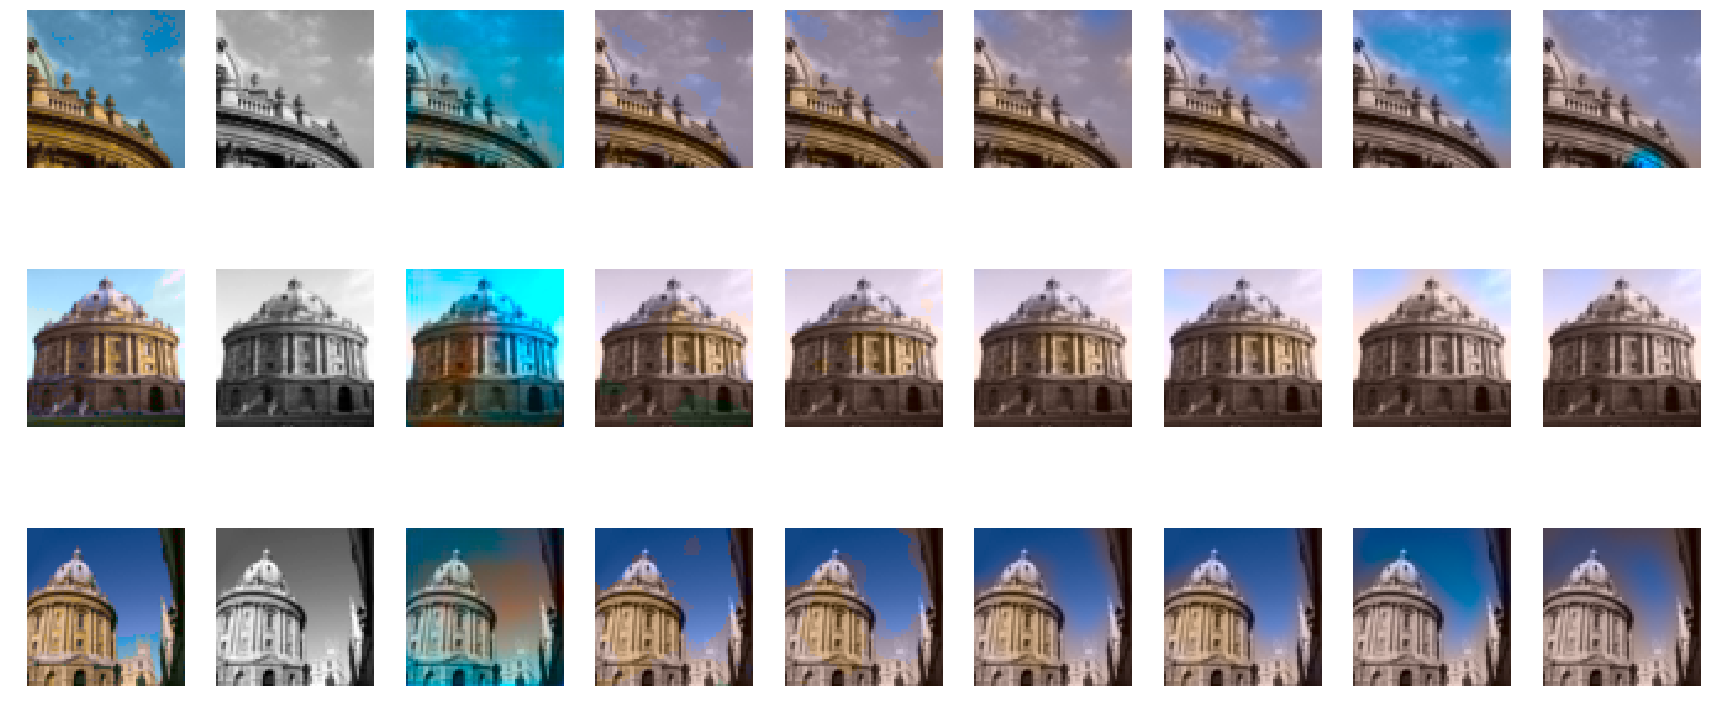

In [81]:
# compare results
X,Y = generator(test_size, test_dir, H, W).__next__()
Xwoc,Ywoc = generator_woc(test_size, test_dir, H, W).__next__()
Yhat1 = _1_BM.predict(Xwoc)
Yhat2 = _2_BM.predict(X)
Yhat3 = _3_BM.predict(X)
Yhat4 = _4_M1.predict(X)
Yhat5 = _5_M2.predict(X)
Yhat6 = _6_M3.predict(X)

j =1
plt.figure(figsize=(30,13.5))
for i in range(test_size):
    # original
    plt.subplot(test_size,9,j)
    j+=1
    img = XY2img(X[i],Y[i])
    plt.imshow(img)
    plt.axis('OFF')
    # grayscale
    plt.subplot(test_size,9,j)
    j+=1
    plt.imshow(X[i,:,:,0],'gray')
    plt.axis('OFF')
    # predict
    plt.subplot(test_size,9,j)
    j += 1
    img = XY2img_woc(X[i],Yhat1[i])
    plt.imshow(img)
    plt.axis('OFF')
    # predict
    plt.subplot(test_size,9,j)
    j += 1
    img = XY2img(X[i],Yhat2[i])
    plt.imshow(img)
    plt.axis('OFF')
    # predict
    plt.subplot(test_size,9,j)
    j += 1
    img = XY2img(X[i],Yhat3[i])
    plt.imshow(img)
    plt.axis('OFF')
    # predict
    plt.subplot(test_size,9,j)
    j += 1
    img = XY2imgf(X[i],Yhat3[i])
    plt.imshow(img)
    plt.axis('OFF')
    # predict
    plt.subplot(test_size,9,j)
    j += 1
    img = XY2imgf(X[i],Yhat4[i])
    plt.imshow(img)
    plt.axis('OFF')
    # predict
    plt.subplot(test_size,9,j)
    j += 1
    img = XY2imgf(X[i],Yhat5[i])
    plt.imshow(img)
    plt.axis('OFF')
    # predict
    plt.subplot(test_size,9,j)
    j += 1
    img = XY2imgf(X[i],Yhat6[i])
    plt.imshow(img)
    plt.axis('OFF')

# Show result on test images

In [64]:
#define parameters:
test_dir = r"../../images/oxford/selected/*.jpg"
H = 64
W = 64
test_size = 3

/home/tking/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':


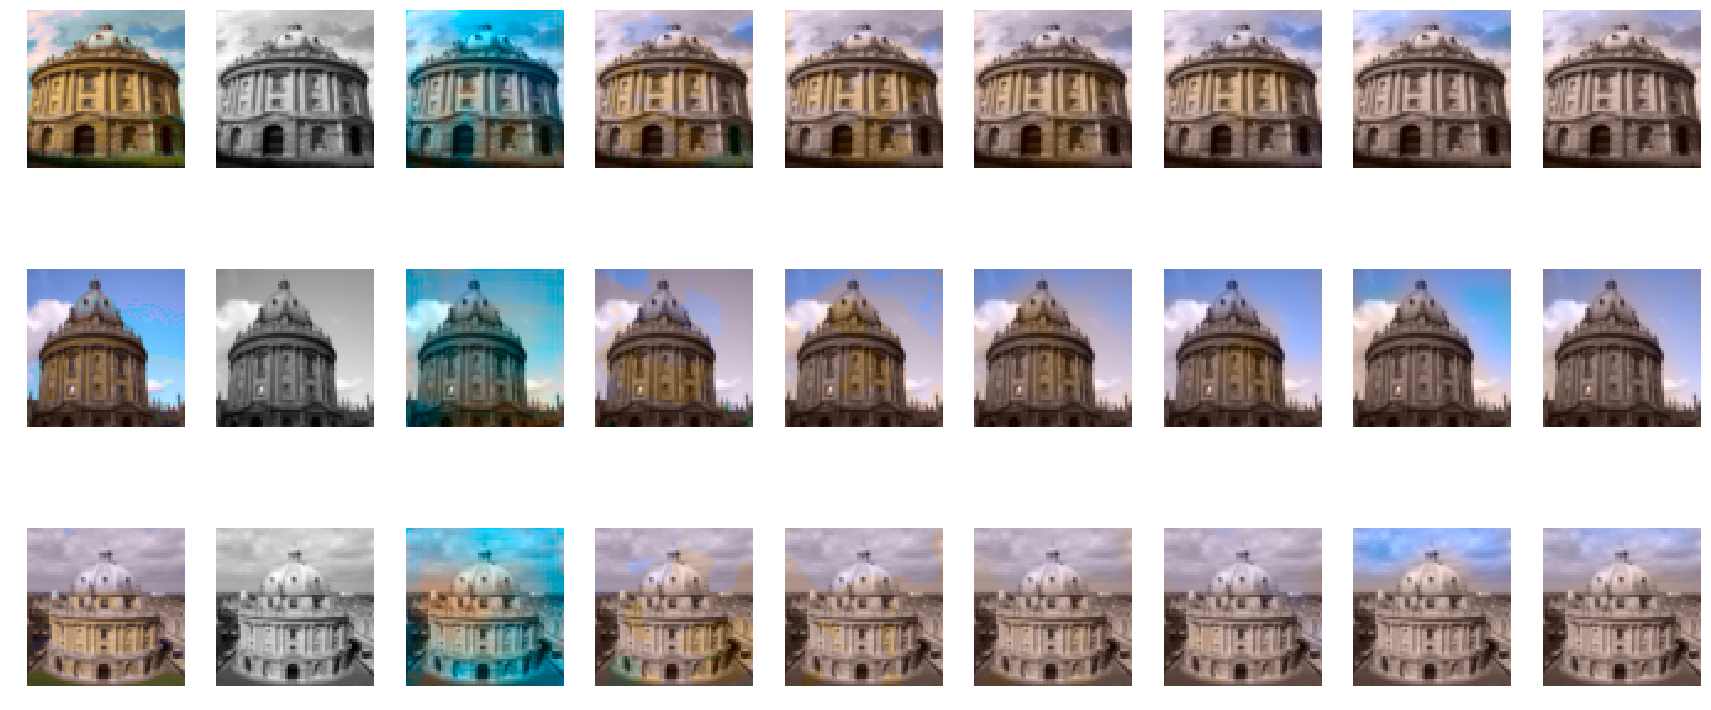

In [65]:
# compare results
X,Y = generator(test_size, test_dir, H, W).__next__()
Xwoc,Ywoc = generator_woc(test_size, test_dir, H, W).__next__()
Yhat1 = _1_BM.predict(Xwoc)
Yhat2 = _2_BM.predict(X)
Yhat3 = _3_BM.predict(X)
Yhat4 = _4_M1.predict(X)
Yhat5 = _5_M2.predict(X)
Yhat6 = _6_M3.predict(X)

j =1
plt.figure(figsize=(30,13.5))
for i in range(test_size):
    # original
    plt.subplot(test_size,9,j)
    j+=1
    img = XY2img(X[i],Y[i])
    plt.imshow(img)
    plt.axis('OFF')
    # grayscale
    plt.subplot(test_size,9,j)
    j+=1
    plt.imshow(X[i,:,:,0],'gray')
    plt.axis('OFF')
    # predict
    plt.subplot(test_size,9,j)
    j += 1
    img = XY2img_woc(X[i],Yhat1[i])
    plt.imshow(img)
    plt.axis('OFF')
    # predict
    plt.subplot(test_size,9,j)
    j += 1
    img = XY2img(X[i],Yhat2[i])
    plt.imshow(img)
    plt.axis('OFF')
    # predict
    plt.subplot(test_size,9,j)
    j += 1
    img = XY2img(X[i],Yhat3[i])
    plt.imshow(img)
    plt.axis('OFF')
    # predict
    plt.subplot(test_size,9,j)
    j += 1
    img = XY2imgf(X[i],Yhat3[i])
    plt.imshow(img)
    plt.axis('OFF')
    # predict
    plt.subplot(test_size,9,j)
    j += 1
    img = XY2imgf(X[i],Yhat4[i])
    plt.imshow(img)
    plt.axis('OFF')
    # predict
    plt.subplot(test_size,9,j)
    j += 1
    img = XY2imgf(X[i],Yhat5[i])
    plt.imshow(img)
    plt.axis('OFF')
    # predict
    plt.subplot(test_size,9,j)
    j += 1
    img = XY2imgf(X[i],Yhat6[i])
    plt.imshow(img)
    plt.axis('OFF')

# Compare loss

In [17]:
hist = []
hist.append(np.loadtxt('1_BM_alp_history.txt',delimiter=','))
hist.append(np.loadtxt('2_BM_ab_alp_history.txt',delimiter=','))
hist.append(np.loadtxt('3_BM_ab_cw_ft_alp_history.txt',delimiter=','))
hist.append(np.loadtxt('4_M1_ab_cw_ft_alp_history.txt',delimiter=','))
hist.append(np.loadtxt('5_M2_ab_cw_ft_alp_history.txt',delimiter=','))
hist.append(np.loadtxt('6_M3_ab_cw_ft_alp_history.txt',delimiter=','))

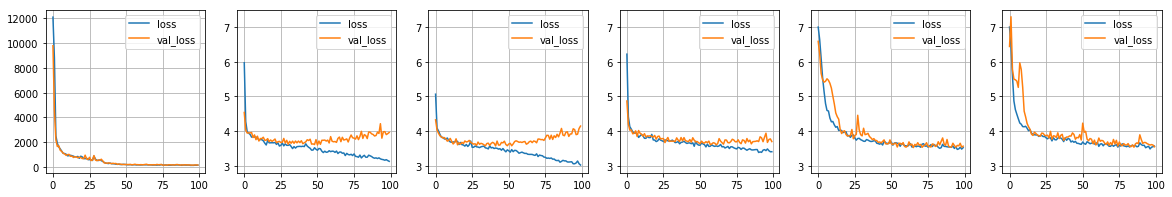

In [27]:
plt.figure(figsize=(20,3))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.plot(hist[i][0])
    plt.plot(hist[i][1])
    plt.legend(['loss','val_loss'])
    if i>0: plt.ylim(2.8,7.5)
    plt.grid()